In [1]:
!pip install gensim


In [2]:
import gensim
import pandas as pd
import gensim.downloader


Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['freedom']

# Getting the most similar words

print(model.most_similar('freedom'))

# Getting the similarity between two words

print(model.similarity('freedom', 'democracy'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('freedoms', 0.7783923149108887), ('rights', 0.7624185681343079), ('democracy', 0.73871248960495), ('liberty', 0.716819167137146), ('independence', 0.7036619782447815), ('equality', 0.7002561092376709), ('dignity', 0.6816196441650391), ('liberties', 0.6800701022148132), ('respect', 0.6753633618354797), ('free', 0.6614599823951721)]
0.73871255


Part 1a

In [4]:

#find the most similar words to a word of your choice.
print(model.most_similar('car'))
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
#I got 'vehicle,' 'trucks,' 'cars,' 'driver,' and 'driving' and more as the most similar words to 'car.' This makes sense since they all relate directly to types of vehicles or actions associated with cars. It's interesting to see how both specific (like 'trucks') and general (like 'vehicle') terms show up, reflecting different aspects of the concept of a car. Did anyone get words that weren't directly related to vehicles? I'm curious if changing the context could bring up other associations!

[('vehicle', 0.8630837798118591), ('truck', 0.8597878813743591), ('cars', 0.837166965007782), ('driver', 0.8185911178588867), ('driving', 0.781263530254364), ('motorcycle', 0.7553156614303589), ('vehicles', 0.7462257146835327), ('parked', 0.74594646692276), ('bus', 0.737270712852478), ('taxi', 0.7155269384384155)]


In [5]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [6]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["women"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('women', 0.5936868786811829), ('post-menopausal', 0.58804851770401), ('cedaw', 0.538861870765686), ('premenopausal', 0.533973753452301), ('ululating', 0.5263110995292664), ('underrepresented', 0.5224738121032715), ('lesbians', 0.5211072564125061), ('aiaw', 0.511288583278656), ('antenatal', 0.5063313841819763), ('postmenopausal', 0.5010088682174683)]
[('thief', 0.5128416419029236), ('hitman', 0.43058234453201294), ('cabdriver', 0.4205518066883087), ('slapper', 0.4180887043476105), ('stonemason', 0.41786989569664), ('informer', 0.41766634583473206), ('rancher', 0.4157513976097107), ('speculator', 0.4153729975223541), ('mechanic', 0.4112204909324646), ('gambler', 0.40910595655441284)]


[('women', 0.7597994804382324),
 ('physicians', 0.7104339003562927),
 ('doctors', 0.6946384310722351),
 ('nurses', 0.6652523875236511),
 ('patients', 0.6637681722640991),
 ('medical', 0.6547445058822632),
 ('medicine', 0.6364367604255676),
 ('clinics', 0.6251500844955444),
 ('nursing', 0.6232957243919373),
 ('doctor', 0.6138885617256165)]

Part 1b

In [7]:
#try to isolate a specific dimension in the embeddings and add it to multiple words.
# Define the "wealth/status" dimension by subtracting 'poor' from 'rich'
wealth = model["rich"] - model["poor"]

# Add the wealth/status dimension to different words
wealthy_profession = model["teacher"] + wealth
wealthy_location = model["city"] + wealth
wealthy_vehicle = model["car"] + wealth

# Check the most similar words to each
print("Most similar to 'wealthy teacher':", model.most_similar(wealthy_profession))
print("Most similar to 'wealthy city':", model.most_similar(wealthy_location))
print("Most similar to 'wealthy car':", model.most_similar(wealthy_vehicle))

#does this show any bias or assumptions in the data?
wealth=model["rich"]-model["poor"]

print(model.most_similar(wealth))
print(model.most_similar(-wealth))

model.most_similar(model["teacher"]+wealth)

# Discuss with your group and share most interesting dimension in the document
#Yes, this example can reveal biases or assumptions in the data about wealth and social status. By adding a "wealth" vector (isolated by subtracting "poor" from "rich") to words like "teacher," "city," or "car," the model may associate these terms with wealth-related concepts, potentially showing biases about socioeconomic status. For exmaple: Adding the "wealth" vector to "teacher" result in associations that lean toward higher-paying or prestigious occupations, suggesting assumptions about wealthier professions. If "teacher" returns words like "rich", "author", "musician"



Most similar to 'wealthy teacher': [('teacher', 0.6680964827537537), ('rich', 0.5727817416191101), ('writer', 0.5442889332771301), ('student', 0.5289105176925659), ('educator', 0.5216258764266968), ('poet', 0.5188854932785034), ('friend', 0.517753541469574), ('taught', 0.5149722099304199), ('musician', 0.5136236548423767), ('author', 0.5125022530555725)]
Most similar to 'wealthy city': [('city', 0.7578812837600708), ('town', 0.6408730149269104), ('rich', 0.629729151725769), ('southern', 0.6000362038612366), ('northern', 0.5800671577453613), ('cities', 0.579162061214447), ('where', 0.571696937084198), ('capital', 0.565071702003479), ('downtown', 0.5610560178756714), ('located', 0.5568658113479614)]
Most similar to 'wealthy car': [('car', 0.7313539385795593), ('truck', 0.6439815163612366), ('vehicle', 0.6040875911712646), ('cars', 0.5820707678794861), ('jeep', 0.5790131688117981), ('suv', 0.5755172371864319), ('minivan', 0.5669410824775696), ('mercedes', 0.5479638576507568), ('parked', 0

[('teacher', 0.6680964827537537),
 ('rich', 0.5727817416191101),
 ('writer', 0.5442889332771301),
 ('student', 0.5289105176925659),
 ('educator', 0.5216258764266968),
 ('poet', 0.5188854932785034),
 ('friend', 0.517753541469574),
 ('taught', 0.5149722099304199),
 ('musician', 0.5136236548423767),
 ('author', 0.5125022530555725)]

Part 2: Visualization and Embeddings in Space

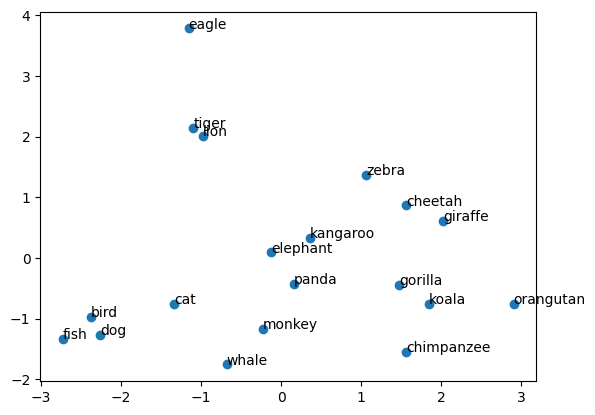

In [8]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

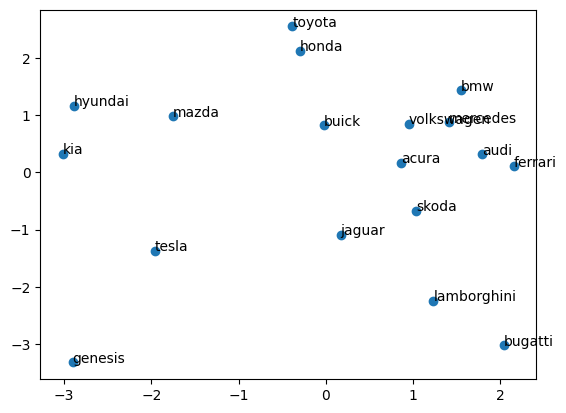

In [9]:
#repeat this process with your own set of 10-20 words.
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words=["ferrari","toyota","mazda", "audi", "bmw", "mercedes", "lamborghini", "hyundai", "honda", "bugatti", "volkswagen", "kia", "genesis", "jaguar", "acura", "tesla", "buick", "skoda" ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#After seeing result we are surprised or confused let say. We were wondering on what bases it spreaded because it seems very random

[==================================================] 100.0% 387.1/387.1MB downloaded


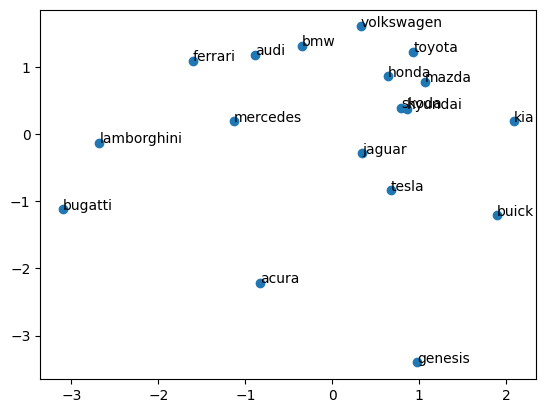

In [10]:
# repeat the process with a different pre-trained model and the same set of words.
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


# Extract embeddings for the same set of words using the Twitter model
X_twitter = [twitter_model[word] for word in words if word in twitter_model]

# Perform PCA to reduce to 2 dimensions
X_twitter_pca = pca.fit_transform(X_twitter)

# Plot the 2D projection of the Twitter embeddings
plt.scatter(X_twitter_pca[:, 0], X_twitter_pca[:, 1])

for i, word in enumerate([word for word in words if word in twitter_model]):
    plt.annotate(word, (X_twitter_pca[i, 0], X_twitter_pca[i, 1]))

plt.show()

#i think we do see pattern in this one, more common and daily driven are shrugg together such as toyota, hyundai, honda, mazda, bmw, audi


Part 3: Embedding reddit posts

In [12]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [20]:
#using the code from project 1, clean the text and create a bag of words representation of the text
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [24]:
import spacy
languagemodel = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = languagemodel(text)  # Use the correct variable name here
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]  # Use .lemma_ instead of .lemma for the lemma
    return ' '.join(tokens)

def clean(text):
    # Remove newline and extra space characters
    text = ' '.join(text.split())
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Assuming 'data' is a DataFrame with a 'text' column
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [25]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
from sklearn.decomposition import PCA

In [27]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns?
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(bag_of_words.toarray())

# Plot the PCA with color-coded labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='viridis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()


KeyError: 'label'

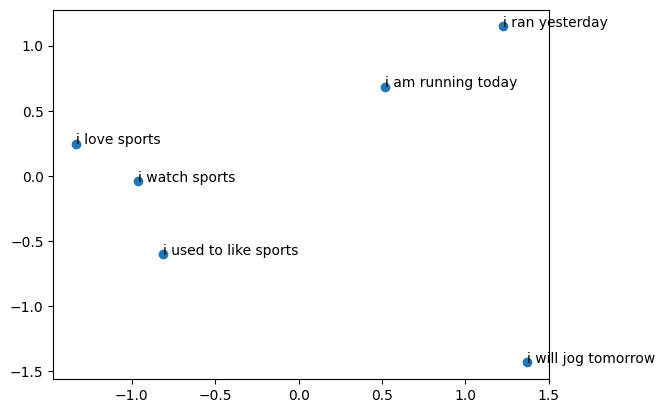

In [28]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i watch sports", "i love sports", "i used to like sports"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

Part 4: HuggingFace and BERT

In [15]:
!pip install transformers

In [16]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [17]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [18]:
import pandas as pd
from transformers import pipeline

# Load both datasets
uiuc_data = pd.read_csv('uiuc.csv')
umich_data = pd.read_csv('umich.csv')

# Combine the datasets into one DataFrame
data = pd.concat([uiuc_data, umich_data], ignore_index=True)

# Initialize the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Define the classify sentiment function
def classify_sentiment(text):
    try:
        return pipe(text)[0]['label']
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return None

# Apply the sentiment classification
data['sentiment'] = data['text'].apply(classify_sentiment)

# Report the most common sentiment label
most_common_sentiment = data['sentiment'].value_counts().idxmax()
print(f"The most common sentiment label is: {most_common_sentiment}")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Token indices sequence length is longer than the specified maximum sequence length for this model (302 > 128). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.

2. Partnerships with Israeli universities such as Hebrew University of Jerusalem

3. Links to Elbit Systems, Northrop Grumman and Raytheon as well as investments in Blackrock which are all involved in supplying for the Israeli military

4. UIC and UIUC partnership with Caterpillar (CAT) which is a manufacturing firm that supplies the IDF with bulldozers

[https://www.forbes.com/sites/erictegler/2023/10/24/israels-armored-caterpillar-bulldozers-will-be-active-in-gaza/](https://www.forbes.com/sites/erictegler/2023/10/24/israels-armored-caterpillar-bulldozers-will-be-active-in-gaza/)

Among many other direct and indirect holdings in corporations supplying the Israeli military with weapons and resources. If you are interested in learning more, SJP UIUC has made a significant amount of posts related specifically to the holdings UIUC has with these corporations.
Error: index out of range in self
Error processing text: 1. How are we funding 

In [19]:
#look at ten sample posts and labels; do you agree with all of them?
sample_posts = data[['text', 'sentiment']].sample(10)
print("Sample posts and their sentiment labels:")
print(sample_posts)

Sample posts and their sentiment labels:
                                                    text sentiment
660    You’ve got two posts on all of Reddit — three ...       NEU
189                                 They don’t exist man       NEG
5767                              It will go on forever.       NEU
10354    I had to google what that even is. Am I cooked?       NEU
747    Parkland will almost certainly have something ...       NEU
541                                            [deleted]       NEU
7599   I have nothing of value to add except I hope t...       NEG
2330   All together traffic has sucked these last few...       NEG
539                                                   Hi       NEU
4085   It’s some water damage, ask them to repair it....       NEU


In [ ]:
#is the UIUC or Michigan subreddit more negative?
#Michigan is more negative